In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import clear_output
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import jieba
import seaborn as sns
import sys
import re
import os
from sklearn import feature_extraction
from glob import glob
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
from func import*
%matplotlib inline

#### 把檔案名稱中以20開頭.txt結尾的檔案存進file_list裡

In [60]:
path = './NEWS/20*.txt'
title, data = readdir(path)


Number of files : 83


#### 顯示部分資料內容

In [61]:
for i in range(len(data)):
    print('----Document : {0}----'.format(title[i]))
    print(data[i][:10], '...', data[i][-10:-1], sep='\n', end='\n\n')

----Document : 2015-03-06 14_31----
農曆春節出貨少 國巨
...
電子產品較為顯著。

----Document : 2015-03-13 16_08----
國巨去年全年每股稅後
...
業績進一步的成長。

----Document : 2015-04-17 18_02----
國巨首季EPS達1.
...
業績進一步的成長。

----Document : 2015-05-08 15_03----
國巨4月營收23.8
...
需求則較上月趨緩。

----Document : 2015-06-08 15_04----
國巨5月營收23.1
...
需求則較上月趨緩。

----Document : 2015-06-12 16_13----
國巨宣布買回庫藏股

...
場及全球資源整合。

----Document : 2015-07-13 15_29----
國巨6月營收22.3
...
需求則較上月趨緩。

----Document : 2015-08-07 14_41----
國巨7月合併營收22
...
需求則較上月趨緩。

----Document : 2015-08-12 17_27----
國巨上半年每股盈餘2
...
8元至69.9元。

----Document : 2015-08-13----
國巨上半年EPS2.
...
.8-69.9元。

----Document : 2015-09-09 15_09----
國巨8月營收 月增率
...
需求則較上月趨緩。

----Document : 2015-09-23----
國巨轉型 邁向車用高
...
、產品品質更優良。

----Document : 2015-10-06 14_47----
國巨9月營收24.8
...
需求則較上月趨緩。

----Document : 2015-10-07----
國巨9月營收月增5.
...
仍能「審慎樂觀」。

----Document : 2015-10-13 16_49----
國巨董事會宣佈實施庫
...
3-77.6元間。

----Document : 2015-10-14----
國巨買回3千萬股庫藏
...
3-77.6元間。

----Document : 2015-11-05 09_58-

#### 處理stopword

In [62]:
stopwords = ['一','二','三','四','五','六']
#puncs_Full = '！？｡＂＃＄％＆＇（）()＊＋，－／：；＜＝＞＠［＼］$＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;<=>@[]^_{}|~\\\""
savetofile('./stopword.txt', [stopwords, puncs_Half])

In [63]:
stopword = readdir('./stopword.txt')[1][0].split('\r\n')
#stopword.append('\n')
stopword[0:10]


Number of files : 1


['一', '二', '三', '四', '五', '六', '！', '？', '!', '?']

In [64]:
wordDictionary = []
for i in range(len(data)):
    seg_list = jieba.cut(data[i], cut_all=False)
    seg_list = list(seg_list)
    wordDict = {}
    for w in seg_list:
        if (w not in stopword) and (w not in puncs_Full) and (w not in puncs_Half):
            if w in wordDict:
                wordDict[w] = wordDict[w] + 1
            else:
                wordDict[w] = 1
    wordDictionary.append(wordDict)
    print('Number of word in document ({0}) : '.format(title[i]), len(wordDict))
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    print(sort[0:10])
    data[i] = ' '.join(jieba.cut(data[i], cut_all=False))

Number of word in document (2015-03-06 14_31) :  90
[('月', 7), ('較', 5), ('國巨', 4), (' ', 3), ('2', 3), ('\n', 3), ('地區', 3), ('農', 2), ('曆', 2), ('營收', 2)]
Number of word in document (2015-03-13 16_08) :  163
[(' ', 12), ('億元', 9), ('成長', 7), ('國巨', 5), ('元', 5), ('為', 5), ('較', 5), ('去年', 4), ('每股', 4), ('去年同期', 4)]
Number of word in document (2015-04-17 18_02) :  186
[(' ', 12), ('億元', 7), ('較', 6), ('國巨', 5), ('元', 5), ('成長', 4), ('收入', 4), ('的', 4), ('\n', 3), ('第一季', 3)]
Number of word in document (2015-05-08 15_03) :  75
[('月', 8), ('上', 5), ('4', 4), ('國巨', 3), ('億元', 3), ('\n', 3), ('較', 3), ('成長', 3), ('之', 3), ('需求', 3)]
Number of word in document (2015-06-08 15_04) :  73
[('月', 10), ('上', 5), ('5', 4), ('國巨', 3), ('營收', 3), ('億元', 3), ('\n', 3), ('較', 3), ('成長', 3), ('地區', 3)]
Number of word in document (2015-06-12 16_13) :  154
[('國巨', 5), ('買', 5), ('股份', 5), ('回', 4), ('公司', 4), ('的', 4), ('及', 4), ('\n', 3), ('12', 3), ('為', 3)]
Number of word in document (2015-07-13 15

[('元', 7), ('華', 5), ('新科', 5), ('也', 5), ('價格', 5), ('在', 4), ('到', 4), ('被動', 3), ('元件', 3), ('奇力', 3)]
Number of word in document (2018-02-02 09_26) :  118
[('調漲', 5), ('國巨', 4), ('元', 4), ('電阻', 3), ('上', 3), ('400', 3), ('\n', 3), ('20', 3), ('厚膜', 2), ('漲價', 2)]
Number of word in document (2018-02-02) :  189
[('電阻', 9), ('晶片', 8), ('價格', 8), ('今年', 7), ('漲價', 7), ('的', 6), ('於', 6), ('調漲', 6), ('月', 5), ('巨集', 5)]
Number of word in document (2018-02-05) :  209
[('IC', 5), ('今年', 5), ('聯發科', 5), ('表現', 4), ('下', 4), ('的', 4), ('獲利', 4), ('設計', 3), ('\n', 3), ('本季', 3)]
Number of word in document (2018-02-07 18_21) :  41
[('\n', 3), ('協助', 2), ('重建', 2), (' ', 2), ('500', 2), ('捐款', 2), ('花蓮', 2), ('花蓮救災', 1), ('國巨捐', 1), ('萬', 1)]
Number of word in document (2018-02-22 19_59) :  184
[('億元', 9), ('國巨', 6), ('元', 5), ('及', 5), ('為', 4), ('股利', 4), ('高達', 3), ('\n', 3), ('成長', 3), ('每股', 3)]
Number of word in document (2018-02-28) :  225
[('元', 7), ('的', 6), ('去年', 5), ('張', 5), ('國巨

In [65]:
limit = 0
wordsperdocument = 50
for i in range(len(data)):
    count = 0
    print('----Document : {0}----'.format(title[i]))
    for ind, value in wordDictionary[0].items():
        if (value <= limit) & (count != wordsperdocument):
            count += 1
            print(ind, end = ', ')
    print()

----Document : 2015-03-06 14_31----

----Document : 2015-03-13 16_08----

----Document : 2015-04-17 18_02----

----Document : 2015-05-08 15_03----

----Document : 2015-06-08 15_04----

----Document : 2015-06-12 16_13----

----Document : 2015-07-13 15_29----

----Document : 2015-08-07 14_41----

----Document : 2015-08-12 17_27----

----Document : 2015-08-13----

----Document : 2015-09-09 15_09----

----Document : 2015-09-23----

----Document : 2015-10-06 14_47----

----Document : 2015-10-07----

----Document : 2015-10-13 16_49----

----Document : 2015-10-14----

----Document : 2015-11-05 09_58----

----Document : 2015-11-05----

----Document : 2015-11-10 10_27----

----Document : 2015-12-07 15_18----

----Document : 2015-12-08----

----Document : 2016-02-18 16_11----

----Document : 2016-02-19----

----Document : 2016-03-03 16_56----

----Document : 2016-03-14----

----Document : 2016-04-20----

----Document : 2016-06-02 16_58----

----Document : 2016-06-03 10_38----

----Document : 201

In [66]:
for i in range(len(data)):
    for key, value in wordDictionary[0].items():
        if value <= limit:
            data[i] = data[i].replace(key, '')
    print('document :', title[i])
    print(data[i][:50], '...', data[i][-50:-1], sep='', end='\n\n')

document : 2015-03-06 14_31
農 曆 春節 出貨少   國巨 2 月 營收 月 減率 28.7% 
 2015 - 03 - 06...月 趨緩 ， 其中 以經 銷商 通路 、 工業 用產品 及 消費性 電子 產品 較 為 顯著 。 

document : 2015-03-13 16_08
國巨 去年 全年 每股 稅後盈餘 2.3 元   減資 後 5.78 元 
 2015 - 03 -...歐美 市場 及 整合 全球 資源 ， 以強 化國際 競爭力 及 帶動業績 進 一步 的 成長 。 

document : 2015-04-17 18_02
國巨 首季 EPS 達 1.4 元   成長 18% 
 2015 - 04 - 17   18 :... 產品 研發及 拓展 歐美 市場 ， 以強 化國際 競爭力 並帶 動業績 進 一步 的 成長 。 

document : 2015-05-08 15_03
國巨 4 月 營收 23.84 億元   月 減率 5.1% 
 2015 - 05 - 08   ...月 成長 ， 而 手機 通訊及 消費性 電子 產品 及 EMS 之 需求 則較 上 月 趨緩 。 

document : 2015-06-08 15_04
國巨 5 月 營收 23.1 億元   月 減率 3.1% 
 2015 - 06 - 08   1...成長 ， 而 消費性 電子 產品 、 工業 用產品 及 EMS 之 需求 則較 上 月 趨緩 。 

document : 2015-06-12 16_13
國巨 宣布 買 回庫 藏 股 
 2015 - 06 - 12   16 : 13 
 〔 記者 張... 、 執行 既定 策略 、 創新產品 研發 、 加速 拓展 歐美 市場 及 全球 資源 整合 。 

document : 2015-07-13 15_29
國巨 6 月 營收 22.39 億元   月 減率 3.1% 
 2015 - 07 - 13   ...長 ， 而 手機 通訊 、 經銷商 通路 及 電腦 相關 產品 之 需求 則較 上 月 趨緩 。 

document : 2015-08-07 14_41
國巨 7 月合 併 營收 22.82 億元 ‏   月 成長 率 1.9% 
 2015 - 0

In [67]:
for i in range(len(data)):
    data[i] = re.sub('[^\u4e00-\u9fff ]', '', data[i])
#[^\u4e00-\u9fff A-Za-z0-9]

In [68]:
for i in range(len(data)):
    print('document :', title[i])
    print(data[i][:20], ' ... ', data[i][-20:-1], sep='', end='\n\n')

document : 2015-03-06 14_31
農 曆 春節 出貨少   國巨  月 營 ... 及 消費性 電子 產品 較 為 顯著 

document : 2015-03-13 16_08
國巨 去年 全年 每股 稅後盈餘  元  ... 力 及 帶動業績 進 一步 的 成長 

document : 2015-04-17 18_02
國巨 首季  達  元   成長     ... 力 並帶 動業績 進 一步 的 成長 

document : 2015-05-08 15_03
國巨  月 營收  億元   月 減率  ...  及  之 需求 則較 上 月 趨緩 

document : 2015-06-08 15_04
國巨  月 營收  億元   月 減率  ...  及  之 需求 則較 上 月 趨緩 

document : 2015-06-12 16_13
國巨 宣布 買 回庫 藏 股       ... 展 歐美 市場 及 全球 資源 整合 

document : 2015-07-13 15_29
國巨  月 營收  億元   月 減率  ...  產品 之 需求 則較 上 月 趨緩 

document : 2015-08-07 14_41
國巨  月合 併 營收  億元    月 ...  產品 之 需求 則較 上 月 趨緩 

document : 2015-08-12 17_27
國巨 上半年 每股 盈餘  元   宣布 ...  價格 為 新 臺 幣  元至  元 

document : 2015-08-13
國巨 上半年  元         記者 ... 日  買 回區間 價格 為    元 

document : 2015-09-09 15_09
國巨  月 營收   月 增率      ...  通路 之 需求 則較 上 月 趨緩 

document : 2015-09-23
國巨 轉型   邁向 車用 高端 市場  ... 夠 更 精進  產品 品質 更 優良 

document : 2015-10-06 14_47
國巨  月 營收  億   月 增率   ...  通訊 之 需求 則較 上 月 趨緩 

document : 2015-10-07
國巨  月 營收 月 增         ... 明年 

In [69]:
tfidf_vectorizer = TfidfVectorizer(max_df = 1, min_df = 0, analyzer = 'word'
                                   , stop_words = stopword, max_features = 10000)
print(tfidf_vectorizer.get_stop_words())

frozenset({'', '+', '~', '！', '"', '}', '.', '四', '\\', '>', '{', '$', '<', ',', '三', '？', '#', '五', '/', '*', '?', ';', '-', '六', '二', '!', '[', '=', '一', ')', '|', '&', "'", ']', '@', '%', '_', ':', '^', '('})


In [70]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data)
print(tfidf_matrix.shape)

(83, 1693)


In [71]:
words = tfidf_vectorizer.get_feature_names()
print(words[0:50])

['一件', '一位', '一半', '一城', '一天', '一年', '一提', '一斑', '一早', '一樣', '一次性', '一段', '一波', '一班', '一環', '一統', '一線', '一腳', '一舉', '一貫', '一開春', '一陣', '一電容廠', '一頭', '三大產品', '三星', '三次', '上千', '上升', '上午', '上國', '上揚', '上櫃', '上游', '上課', '下績', '不予', '不停', '不再', '不好', '不小', '不得已', '不承認', '不敗', '不易', '不景氣', '不漲', '不無關', '不知', '不至']


In [72]:
data = pd.DataFrame(tfidf_matrix.toarray().T, index = words, columns = title)
data.head()

,2015-03-06 14_31,2015-03-13 16_08,2015-04-17 18_02,2015-05-08 15_03,2015-06-08 15_04,2015-06-12 16_13,2015-07-13 15_29,2015-08-07 14_41,2015-08-12 17_27,2015-08-13,...,2018-02-05,2018-02-07 18_21,2018-02-22 19_59,2018-02-28,2018-03-05 17_46,2018-03-05,2018-03-06 09_45,2018-03-08 17_30,2018-03-09,2018-03-20 10_24
一件,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
一位,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
一半,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125988,0.0,0.0,0.0,0.0
一城,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
一天,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0



f, ax = plt.subplots(figsize=(15,15))
plt.title('Correlation of Documents', fontsize = 13)
sns.heatmap(data.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

In [77]:
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data.values)
data_std

array([[-0.05442504, -0.07310553, -0.0689041 , ..., -0.15040924,
        -0.17112456, -0.09454741],
       [-0.05442504, -0.07310553, -0.0689041 , ..., -0.15040924,
        -0.17112456, -0.09454741],
       [-0.05442504, -0.07310553, -0.0689041 , ..., -0.15040924,
        -0.17112456, -0.09454741],
       ..., 
       [-0.05442504, -0.07310553, -0.0689041 , ..., -0.15040924,
        -0.17112456, -0.09454741],
       [-0.05442504, -0.07310553, -0.0689041 , ..., -0.15040924,
        -0.17112456, -0.09454741],
       [-0.05442504, -0.07310553, -0.0689041 , ..., -0.15040924,
        -0.17112456, -0.09454741]])

In [82]:
pca = PCA(n_components=7)
x_7d = pca.fit_transform(data_std)
print(x_7d.shape)

(1693, 7)


In [79]:
pca4 = PCA(n_components=4)
x_4d = pca.fit_transform(data_std)
x_4d

array([[  1.12370326e+00,   4.21571711e-01,   1.69152674e+00, ...,
         -1.03188897e+00,   3.07526923e-01,   1.38185692e-01],
       [  1.12370326e+00,   4.21571711e-01,   1.69152674e+00, ...,
         -1.03188897e+00,   3.07526923e-01,   1.38185692e-01],
       [ -1.10231206e-03,   3.31570596e-02,   2.49816867e-01, ...,
          8.72955891e-01,  -4.89708640e-01,  -1.12124066e+00],
       ..., 
       [  1.21226342e+00,  -8.04035151e-01,   1.45779965e+00, ...,
          1.56004729e+00,  -6.58437259e-02,   7.17581225e-01],
       [ -7.21207357e-01,   7.51805696e-01,   3.12104884e-02, ...,
         -5.24349453e-01,   6.28657070e-01,  -6.32231253e-01],
       [  3.67753230e+00,   2.59570249e-01,  -1.45903298e+00, ...,
         -1.41763802e-01,   6.13452254e-01,  -6.60520346e-02]])

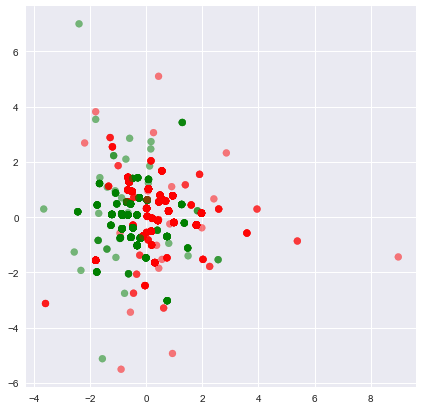

In [81]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 2)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_7d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_7d[:,0],x_7d[:,2], c= label_color, alpha=0.5) 
plt.show()